In [10]:
import scanpy as sc
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
rpath = 'Z:/Connie/RIBOmap/result/FUCCI data'

In [11]:
adata_star = sc.read_h5ad(rpath+'/adata/FUCCI_starmap_cc_02-22-22.h5ad')
adata_ribo = sc.read_h5ad(rpath+'/adata/FUCCI_ribomap_cc_02-22-22.h5ad')
adata = sc.read_h5ad(rpath+'/adata/FUCCI_cc_02-22-22.h5ad')
genes = adata_ribo.var.index

In [8]:
# coding non-coding
coding_info = pd.read_excel('Z:/Connie/RIBOmap/gene_modules/TEMPOmap non-coding RNA.xlsx')
coding_genes = coding_info[coding_info['Non-coding RNA']==0]['Gene'].values # 988
genes_coding = genes[np.isin(genes, coding_genes)] # 981

<AxesSubplot:ylabel='Count'>

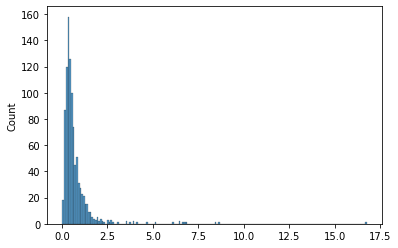

In [12]:
# overall TE
mean_star = np.mean(adata.X[adata.obs['sample']=='STARmap'][adata_star.obs['pass_all_filters']], axis=0)
mean_ribo = np.mean(adata.X[adata.obs['sample']=='RIBOmap'][adata_ribo.obs['pass_all_filters']], axis=0)
te_overall = mean_ribo / mean_star
te_overall = te_overall[np.isin(genes, coding_genes)]
sns.histplot(te_overall)

In [13]:
TE_cc = []
for cc in ['G1', 'S', 'G2M']:
    meancc_star = np.mean(adata.X[adata.obs['sample']=='STARmap'][np.logical_and(adata_star.obs['phase_new']==cc, adata_star.obs['pass_all_filters'])], axis=0)
    meancc_ribo = np.mean(adata.X[adata.obs['sample']=='RIBOmap'][np.logical_and(adata_ribo.obs['phase_new']==cc, adata_ribo.obs['pass_all_filters'])], axis=0)
    te_cc = meancc_ribo / meancc_star
    te_cc = te_cc[np.isin(genes, coding_genes)]
    TE_cc.append(te_cc)

In [14]:
df_te = pd.DataFrame(np.concatenate((np.array(list(genes_coding)*3).reshape(-1,1), 
                                    np.repeat(['G1', 'G1S', 'G2M'], len(genes_coding)).reshape(-1,1),
                                    np.array(TE_cc).reshape(-1,1)), 
                                axis=1), columns=['gene', 'cc', 'value'])
df_te

,gene,cc,value
0,AARS,G1,0.92927504
1,ASXL1,G1,0.3973243
2,COX7B,G1,0.5904125
3,CTGF,G1,0.570854
4,DLX4,G1,0.13080521
...,...,...,...
2938,ZRANB1,G2M,0.59947395
2939,ZSCAN12,G2M,0.4679332
2940,ZSCAN29,G2M,0.46437842
2941,ZXDC,G2M,0.38617763


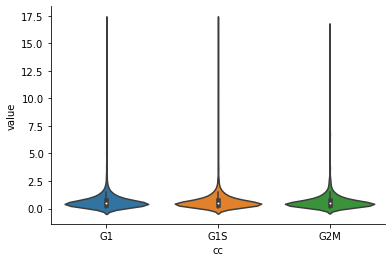

In [15]:
df_te['value'] = df_te['value'].astype(float)
sns.violinplot(data=df_te, x='cc', y='value')
sns.despine()
# plt.savefig(rpath+'/figures/TE/cc.pdf')

C:\Users\wangk\.conda\envs\connie\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\wangk\.conda\envs\connie\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\wangk\.conda\envs\connie\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.w

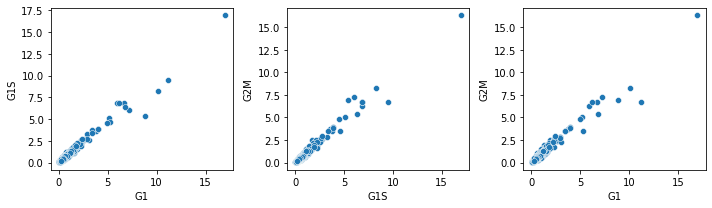

In [16]:
df_te_ = pd.DataFrame(np.array(TE_cc).T, columns=['G1', 'G1S', 'G2M'])
fig, ax = plt.subplots(1,3,figsize=(10,3))
sns.scatterplot(df_te_['G1'], df_te_['G1S'], ax=ax[0])
sns.scatterplot(df_te_['G1S'], df_te_['G2M'], ax=ax[1])
sns.scatterplot(df_te_['G1'], df_te_['G2M'], ax=ax[2])
plt.tight_layout()